### Superhero Statistics
The rise of superheroes and supervillains is at an all time high. The 'Academy of Super Beings(ASB)' was formed to bring order to it. We have with us the data of more than 500 super humans but we need your knowledge of descriptive statistics in figuring out the important insights from it.

* Feature: Description
* ID : Unique character ID
* Name : Name of the character
* Gender : Male/Female
* Intelligence : Intelligence points of the character
* Strength : Strength points of the character
* Speed : Speed points of the character
* Durability : Durability points of the character
* Power : Power points of the character
* Combat : Combat points of the character
* Total : Total sum of all the above points of the character
* Height : Height of the character(-99 value equates to 'immeasurable')
* Weight : Weight of the character(-99 value equates to 'immeasurable')
* SkinColor : Skin color of the the character
* EyeColor : Eye color of the character
* HairColor : Hair color of the character
* Race : Which race the character belongs to

In [1]:
#Header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data loading
data = pd.read_csv("data.csv")

In [4]:
data.head()

,ID,Name,Alignment,Gender,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight,SkinColor,EyeColor,HairColor,Race
0,0,3-D Man,good,Male,50,31,43,32,25,52,233,203.0,441,-,yellow,No Hair,Human
1,1,A-Bomb,good,Male,38,100,17,80,17,64,316,191.0,65,blue,blue,No Hair,Icthyo Sapien
2,2,Abe Sapien,good,Male,88,14,35,42,35,85,299,185.0,90,red,blue,No Hair,Ungaran
3,3,Abin Sur,good,Male,50,90,53,64,84,65,406,203.0,441,-,green,No Hair,Human / Radiation
4,4,Abomination,bad,Male,63,80,53,90,55,95,436,-99.0,-99,-,blue,Black,Cosmic Entity


In [5]:
data.describe()

,ID,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,306.094276,44.468013,28.870370,27.481481,41.671717,40.067340,43.220539,225.779461,100.920875,41.917508
std,176.942473,32.822736,32.468561,25.860447,36.347976,34.343403,33.242786,166.563815,142.606859,132.790361
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,-99.000000,-99.000000
25%,153.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,-99.000000,-99.000000
50%,306.500000,50.000000,10.000000,23.000000,32.000000,37.000000,49.000000,255.000000,175.000000,62.000000
75%,459.750000,75.000000,53.000000,42.000000,80.000000,66.750000,70.000000,349.750000,187.250000,90.000000
max,610.000000,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000,975.000000,900.000000


In [8]:
data.isnull().sum()

ID              0
Name            0
Alignment       0
Gender          0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
Height          0
Weight          0
SkinColor       0
EyeColor        0
HairColor       0
Race            0
dtype: int64

In [9]:
gender_count = data['Gender'].value_counts()
print(gender_count)

Male      413
Female    157
-          24
Name: Gender, dtype: int64


In [10]:
#replacing "-" with 'Agender' in gender column
data['Gender'].replace({'-': 'Agender'}, inplace = True)
gender_count = data['Gender'].value_counts()
print(gender_count)

Male       413
Female     157
Agender     24
Name: Gender, dtype: int64


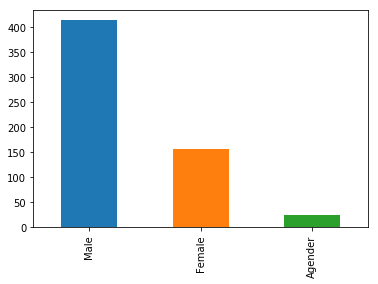

In [11]:
#plotting gender column value counts
gender_count.plot.bar()

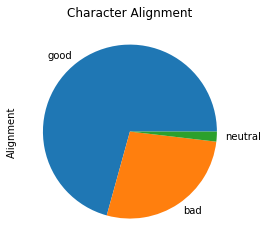

In [12]:
#Heroes Alignment
alignment = data['Alignment'].value_counts()
alignment.plot(kind = 'pie', title = 'Character Alignment')

In [13]:
#Combat Correlation with Stregth

sc_df = data[['Strength','Combat']].copy()
sc_covariance = sc_df.cov().iloc[1,0]
sc_strength = data['Strength'].std()
sc_combat = data['Combat'].std()
sc_pearson = sc_covariance/ (sc_strength * sc_combat)
print(sc_pearson)

0.5720958235612106


In [14]:
#Combat Correlation with Intelligence

ic_df = data[['Intelligence','Combat']].copy()
ic_covariance = ic_df.cov().iloc[1,0]
ic_intelligence = data['Intelligence'].std()
ic_combat = data['Combat'].std()
ic_pearson = ic_covariance/ (ic_intelligence * ic_combat)
print(ic_pearson)

0.7821504525171137


In [16]:
#Overpowered Super Beings

total_high = data['Total'].quantile(q=0.99)
super_best = data[data['Total']>total_high]
super_best_names = list(super_best['Name'])
print(super_best_names)

['Amazo', 'General Zod', 'Martian Manhunter', 'Stardust', 'Superboy-Prime', 'Superman']


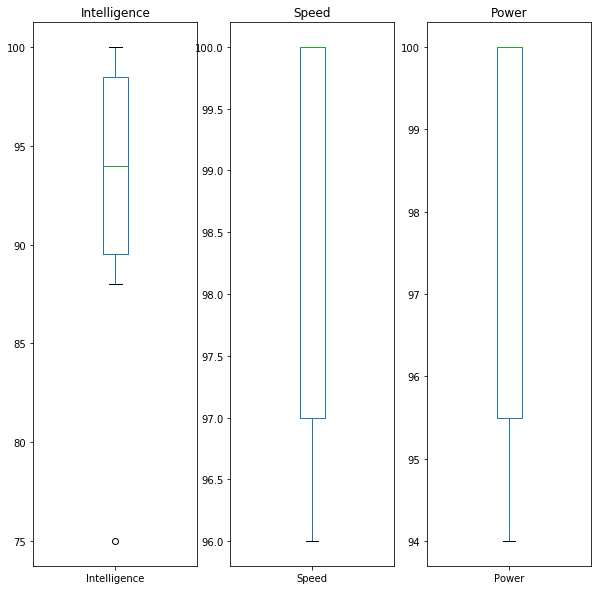

In [17]:
#box plot for Intelligence, speed and power of best superheroes
fig ,(ax_1,ax_2,ax_3) = plt.subplots(1,3, figsize= (10,10))
super_best['Intelligence'].plot.box(ax = ax_1, title = 'Intelligence', showfliers = True)
super_best['Speed'].plot.box(ax = ax_2, title = 'Speed',showfliers = True)
super_best['Power'].plot.box(ax = ax_3, title = 'Power',showfliers = True)

So among all these three inspite of these attributes ranging from 0-100, best superheroes have very high range. 
* Also the intelligence attribute have less variance compared to speed and power.

##### After completing this project, you will have a better grip on the applications of descriptive statistics. In this project, you will be applying the following concepts:

* Bar plotting
* Boxplot plotting
* Pie-chart plotting
* Subplot operations
* Feature Correlation
* IQR operations